### 04. 자동미분

In [ ]:
import torch

#### 4-1. requires_grad

In [ ]:
x = torch.rand(3)
print(x)
print(x.grad) #
print(x.grad_fn)
print(x.requires_grad) # 결과값이 False : 아직 x에 대해서는 자동 미분할 준비가 되어 있지 않다느 뜻

tensor([0.7243, 0.8617, 0.6277])
None
None
False


In [ ]:
x = torch.ones(3, requires_grad = True)
print(x)
print(x.grad) #
print(x.grad_fn)
print(x.requires_grad) # True : 동미분할 준비가 되어 있음

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [ ]:
y = 2 * x
print(y)
print(y.grad) # None, 그라데이션
print(y.grad_fn) # 곱하기
print(y.requires_grad)


tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


<ipython-input-19-c4e3be219f8d>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad) # None, 그라데이션


In [ ]:
z = y ** 2
print(z)
print(z.grad) #
print(z.grad_fn)
print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
None
True


<ipython-input-20-b84b668dea30>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(z.grad) #


### 4-2. backward()
- x -> y -> z 계산에서 역전파를 통해 기울기를 구함


In [ ]:
result = z.sum()
result.backward()

In [ ]:
print(z)
print(z.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
None


<ipython-input-22-b9282361d296>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(z.grad)


### 4-3. no_grad()
- 역전파를 중지

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
print(x.requires_grad)
y = x ** 2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
  y = x ** 2
  print(x.requires_grad)
  print(y.requires_grad)

True
True
True
True
False


### 4-4. detach()
- 나중에 선형회귀를 할 때 사용하게 될텐데, 그래프에서 연산을 분리해주는 역할을 한다.

In [ ]:
y.detach()

tensor(1.)

Epoch [100/1000], Loss: 3.7844
Epoch [200/1000], Loss: 3.6143
Epoch [300/1000], Loss: 3.5515
Epoch [400/1000], Loss: 3.5282
Epoch [500/1000], Loss: 3.5197
Epoch [600/1000], Loss: 3.5165
Epoch [700/1000], Loss: 3.5153
Epoch [800/1000], Loss: 3.5149
Epoch [900/1000], Loss: 3.5147
Epoch [1000/1000], Loss: 3.5147


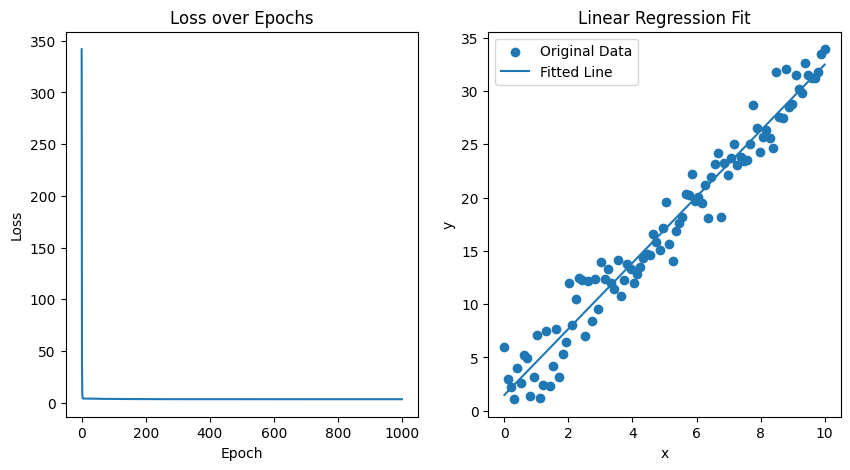

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 선형회귀 연습

# 1. 입출력 정의
x = torch.linspace(0,10, 100).view(-1, 1)  # 1에서 10가지 데이터 100개를 하나씩 떼어서 만든거임.(열 기준), 입력 데이터
y = 3 * x + 2 + torch.randn(100,1) * 2

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택 : MSE, MAE ...
lose_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사 하강법 -> 어떤 것을 사용할지 선택
optimizer = optim.SGD(model.parameters(), lr = 0.01)

# 5. 학습 반복
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad() # 기울기 초기화
  output = model(x) # 예측값 계산
  loss = lose_function(output, y) # 손실 계산
  loss.backward() # 역전파
  optimizer.step() # 가중치 업데이트

  losses.append(loss.item()) # 손실값 저장

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 데이터와 예측 결과 시각화
plt.subplot(1,2,2)
plt.scatter(x.numpy(), y.numpy(), label = "Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), label = "Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Epoch [0], Loss:  389.4817
Epoch [50 / 500], Loss:  4.2265
Epoch [100 / 500], Loss:  4.2202
Epoch [150 / 500], Loss:  4.2165
Epoch [200 / 500], Loss:  4.2142
Epoch [250 / 500], Loss:  4.2128
Epoch [300 / 500], Loss:  4.2119
Epoch [350 / 500], Loss:  4.2114
Epoch [400 / 500], Loss:  4.2111
Epoch [450 / 500], Loss:  4.2109
Epoch [500 / 500], Loss:  4.2108


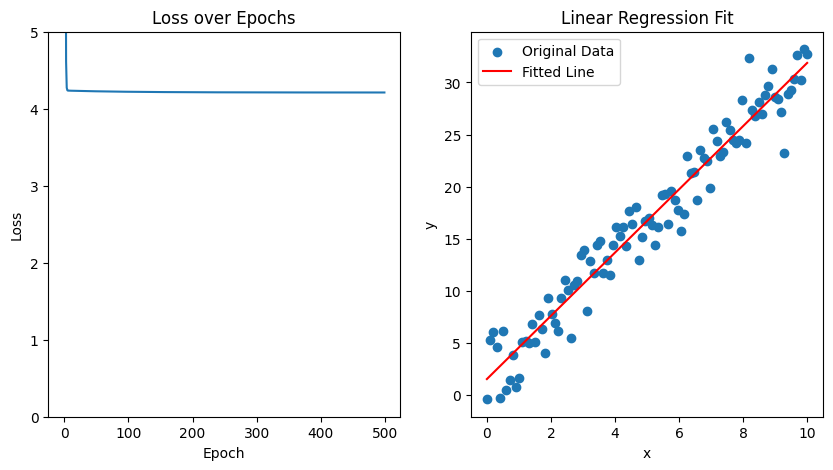

Model parameters
linear.weight: tensor([[3.0320]])
linear.bias: tensor([1.5555])


In [ ]:
# 코드 분석
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 선형회귀 연습
# 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    return self.linear(x)

model = LinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사하강법 -> 어떤 것을 사용할지 선택
# lr = learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 5. 학습 반복
epochs = 500
losses = []

for epoch in range(epochs):
  optimizer.zero_grad() # 기울기 초기화
  outputs = model(x) # 예측값 계산
  loss = loss_function(outputs, y) # 손실 계산
  loss.backward() # 역전파
  optimizer.step() # 가중치 업데이트

  losses.append(loss.item()) # 손실값 저장

  if epoch == 0:
    print(f"Epoch [{epoch}], Loss: {loss.item(): .4f}")
  if (epoch + 1) % 50 == 0:
    print(f"Epoch [{epoch + 1} / {epochs}], Loss: {loss.item(): .4f}")

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 5)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="red", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
  print(f"{name}: {param.data}")

### 실습 1. 선형 회귀 실습
- 배운 내용을 바탕으로 선형 회귀 실습을 함께 진행합니다.

In [ ]:
# 0114 전날 코드 연습

import torch.nn as nn
import torch
import torch.optim as optim # 경사하강법을 도출해내기 위해

# 1. 데이터 입출력
x = torch.linspace(0,10, 100).view(-1, 1)  # 1에서 10가지 데이터 100개를 하나씩 떼어서 만든거임.(열 기준), 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1) # 입출력 데이터의 개수

  def forward(self, x):
    out = self.linear(x)  # 활성화 함수를 정의, 들어오는 값을 그대로 내보낸다. 예) 시그모이드를 활성화함수로 사용한다면 0,1사이 값을 0,1로 내보낸다.
    return out
model = LinearRegressionModel()

# 3. 손실함수 정의
loss_fn = nn.MSELoss() # mean squared error

# 4. 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr =0.01) #(가중치와 편향이 들어 있음)
losses = []
epochs = 1000

for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(x)
  loss = loss_fn(outputs, y) # 손실 계산
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f"epoch: {epoch + 1}/{epochs}, loss:{loss.item(): .4f}")

epoch: 100/1000, loss: 4.6403
epoch: 200/1000, loss: 4.3630
epoch: 300/1000, loss: 4.2605
epoch: 400/1000, loss: 4.2226
epoch: 500/1000, loss: 4.2086
epoch: 600/1000, loss: 4.2034
epoch: 700/1000, loss: 4.2015
epoch: 800/1000, loss: 4.2008
epoch: 900/1000, loss: 4.2005
epoch: 1000/1000, loss: 4.2004


#### 순서
 1. 데이터 입출력
 2. 모델 정의
 3. 손실함수 정의
 4. 가중치 업데이트
 5. 학습 반복
 6. 결과 시각화
 7. 손실 감소 그래프
 8. 데이터와 예측 결과 시각화

#### 실습 1. 다중 선형 회귀 구현
1. 데이터 입출력
- TV, 라디오, 신문 광고비를 입력으로 받고 판매량을 예측합니다.
2. 모델 정의
- 다중 선형 회귀 모델을 정의하세요
3. 손실함수 설정과 가중치 업데이트
- 손실 함수로 MSELoss를 사용하고, 최적화 알고리즘으로 SGD를 사용하세요.
- 학습률은 0.0001로 설정하세요
- 1000번의 에포크 동안 학습시키세요.
4. 결과 분석
- 학습이 완료된 후, 모델의 가중치와 편향을 출력하세요.
- 학습 데이터에 대한 실제 값과 예측 값을 비교하는 산점도 그래프를 그리세요.

Epoch [100/1000], loss: 34.5032
Epoch [200/1000], loss: 22.4058
Epoch [300/1000], loss: 14.8772
Epoch [400/1000], loss: 10.1912
Epoch [500/1000], loss: 7.2742
Epoch [600/1000], loss: 5.4580
Epoch [700/1000], loss: 4.3270
Epoch [800/1000], loss: 3.6223
Epoch [900/1000], loss: 3.1829
Epoch [1000/1000], loss: 2.9088


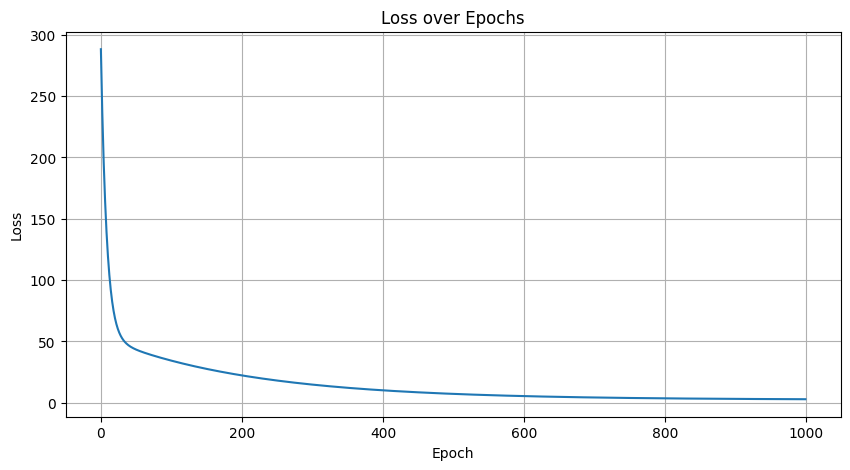

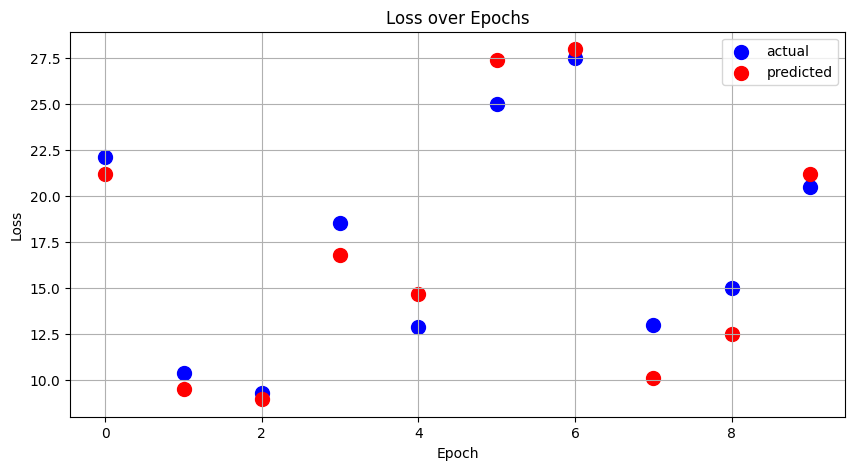

In [40]:
# 실습1.
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
# 1. 데이터 입출력
# 2. 모델 정의
# 3. 손실함수 정의
# 4. 가중치 업데이트
# 5. 학습 반복
# 6. 결과 시각화
# 7. 손실 감소 그래프
# 8. 데이터와 예측 결과 시각화

# 입출력 데이터
X = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9],
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 2. 모델 정의
class MultipleLinearRegression(nn.Module):
  def __init__(self):
    super(MultipleLinearRegression, self).__init__()
    self.linear = nn.Linear(3,1)

  def forward(self, X):
    return self.linear(X)

model = MultipleLinearRegression()

# 3. 손실함수 정의
lose_fn = nn.MSELoss()

# 4. 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr = 0.00001)

# 5. 학습반복
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(X)
  loss = lose_fn(outputs, y)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}')

# 6. 결과 시각화
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
actual = y.numpy()
predicted = model(X).detach().numpy()
plt.scatter(range(len(actual)), actual, label="actual", color = "b", s = 100)
plt.scatter(range(len(predicted)), predicted, label ="predicted", color ='r', s= 100)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.grid(True)
plt.legend()
plt.show()

# 정답 코드 pdf 안에 잇음

### 실습 2. 로지스틱 회귀 표현
- 모델 클래스 정의


Epoch 100 / 1000, Loss : 0.5686
Epoch 200 / 1000, Loss : 0.4013
Epoch 300 / 1000, Loss : 0.3322
Epoch 400 / 1000, Loss : 0.2953
Epoch 500 / 1000, Loss : 0.2724
Epoch 600 / 1000, Loss : 0.2569
Epoch 700 / 1000, Loss : 0.2457
Epoch 800 / 1000, Loss : 0.2372
Epoch 900 / 1000, Loss : 0.2306
Epoch 1000 / 1000, Loss : 0.2253


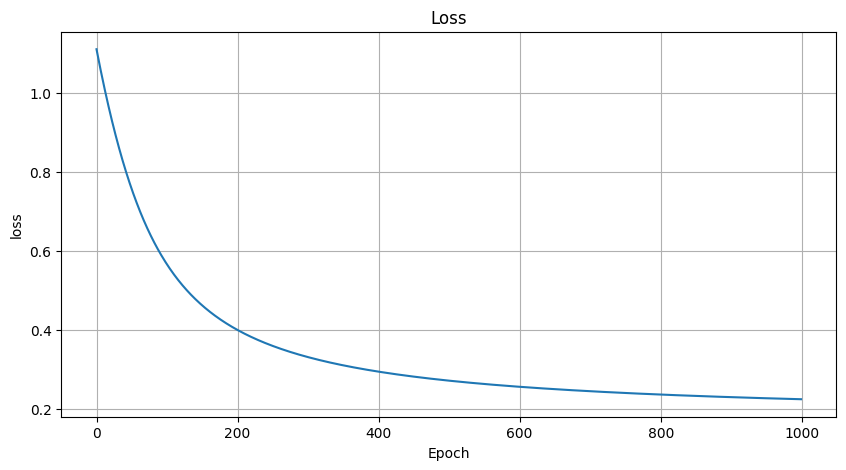

[0.06644204]


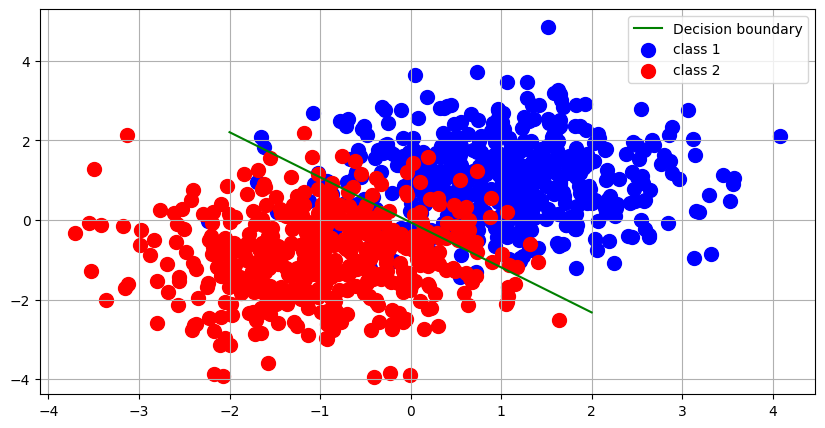

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 1. 입출력 정의
np.random.seed(42) # 원래 np random 하면 값이 랜덤하게 생성되는데, seed를 입력하면, 처음 랜덤하게 입력된 값을 고정하게 됨.
num_samples = 500 # 샘플 500개

# 1-1. class 1
mean_1 = np.array([1.0,1.0]) # 동그랗게 퍼져 있는 점중에서 중심이 되는게 평균
cov_1 = np.array([[1,0],  # x에 퍼진 정도
                  [0,1]])  # y에 퍼진 정도
data_1= np.random.multivariate_normal(mean_1, cov_1, num_samples) # 어떤 평균과 분산에 따라서 데이터가 적당하게 값을 갖도록 하기 위함.

# 1-2. class 0
mean_2 = np.array([-1.0, -1.0]) # 중심점을 -1,-1로 잡음.
cov_2 = np.array([[1,0],
                  [0,1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples)

data = np.vstack((data_1, data_2))
data = torch.from_numpy(data).float()
labels = np.ones(num_samples * 2)
labels[num_samples:] = 0
labels = torch.from_numpy(labels).float().view(-1,1)

# 2. 모델 정의
class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    out = torch.sigmoid(out) # 활성화 함수에 시그모이드를 적용
    return out

model = LogisticRegression(2, 1)

# 3. 손실함수 정의
loss_fn = nn.BCELoss()

# 4. 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr = 0.01)

# 5. 학습 반복
epochs  = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(data)
  loss = loss_fn(outputs,labels)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch {epoch+1} / {epochs}, Loss : {loss.item():.4f}')

plt. figure(figsize=(10,5))
plt.plot(losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()
print(b)

x1 = np.array([-2,2])
x2 = (-(w[0][0] * x1) - b[0]) / w[0][1]

plt.plot(x1, x2, color = "g", label="Decision boundary") # 결정 경계선
plt.scatter(data_1[:,0], data_1[:,1], color ="b", label="class 1", s=100) # 데이터 1 구조가 [[x,y]]로 되어 있음.
plt.scatter(data_2[:,0], data_2[:,1], color ="r", label="class 2", s=100)
plt.grid()
plt.legend()
plt.show()



### FashionMNIST 신경망

In [79]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512),
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256),
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")


Epoch: 1----------------------
loss:  2.3407, [0 / 60000]
loss:  0.5534, [6400 / 60000]
loss:  0.4014, [12800 / 60000]
loss:  0.4423, [19200 / 60000]
loss:  0.4313, [25600 / 60000]
loss:  0.4084, [32000 / 60000]
loss:  0.3385, [38400 / 60000]
loss:  0.4756, [44800 / 60000]
loss:  0.4206, [51200 / 60000]
loss:  0.4315, [57600 / 60000]
Accuracy:  84.8, Avg loss: 0.41103640170234024
Epoch: 2----------------------
loss:  0.3563, [0 / 60000]
loss:  0.3273, [6400 / 60000]
loss:  0.2536, [12800 / 60000]
loss:  0.2920, [19200 / 60000]
loss:  0.2922, [25600 / 60000]
loss:  0.3066, [32000 / 60000]
loss:  0.2514, [38400 / 60000]
loss:  0.3662, [44800 / 60000]
loss:  0.3376, [51200 / 60000]
loss:  0.3394, [57600 / 60000]
Accuracy:  85.5, Avg loss: 0.3850532499658074
Epoch: 3----------------------
loss:  0.2850, [0 / 60000]
loss:  0.2978, [6400 / 60000]
loss:  0.2420, [12800 / 60000]
loss:  0.2341, [19200 / 60000]
loss:  0.2667, [25600 / 60000]
loss:  0.2540, [32000 / 60000]
loss:  0.2232, [38400 /

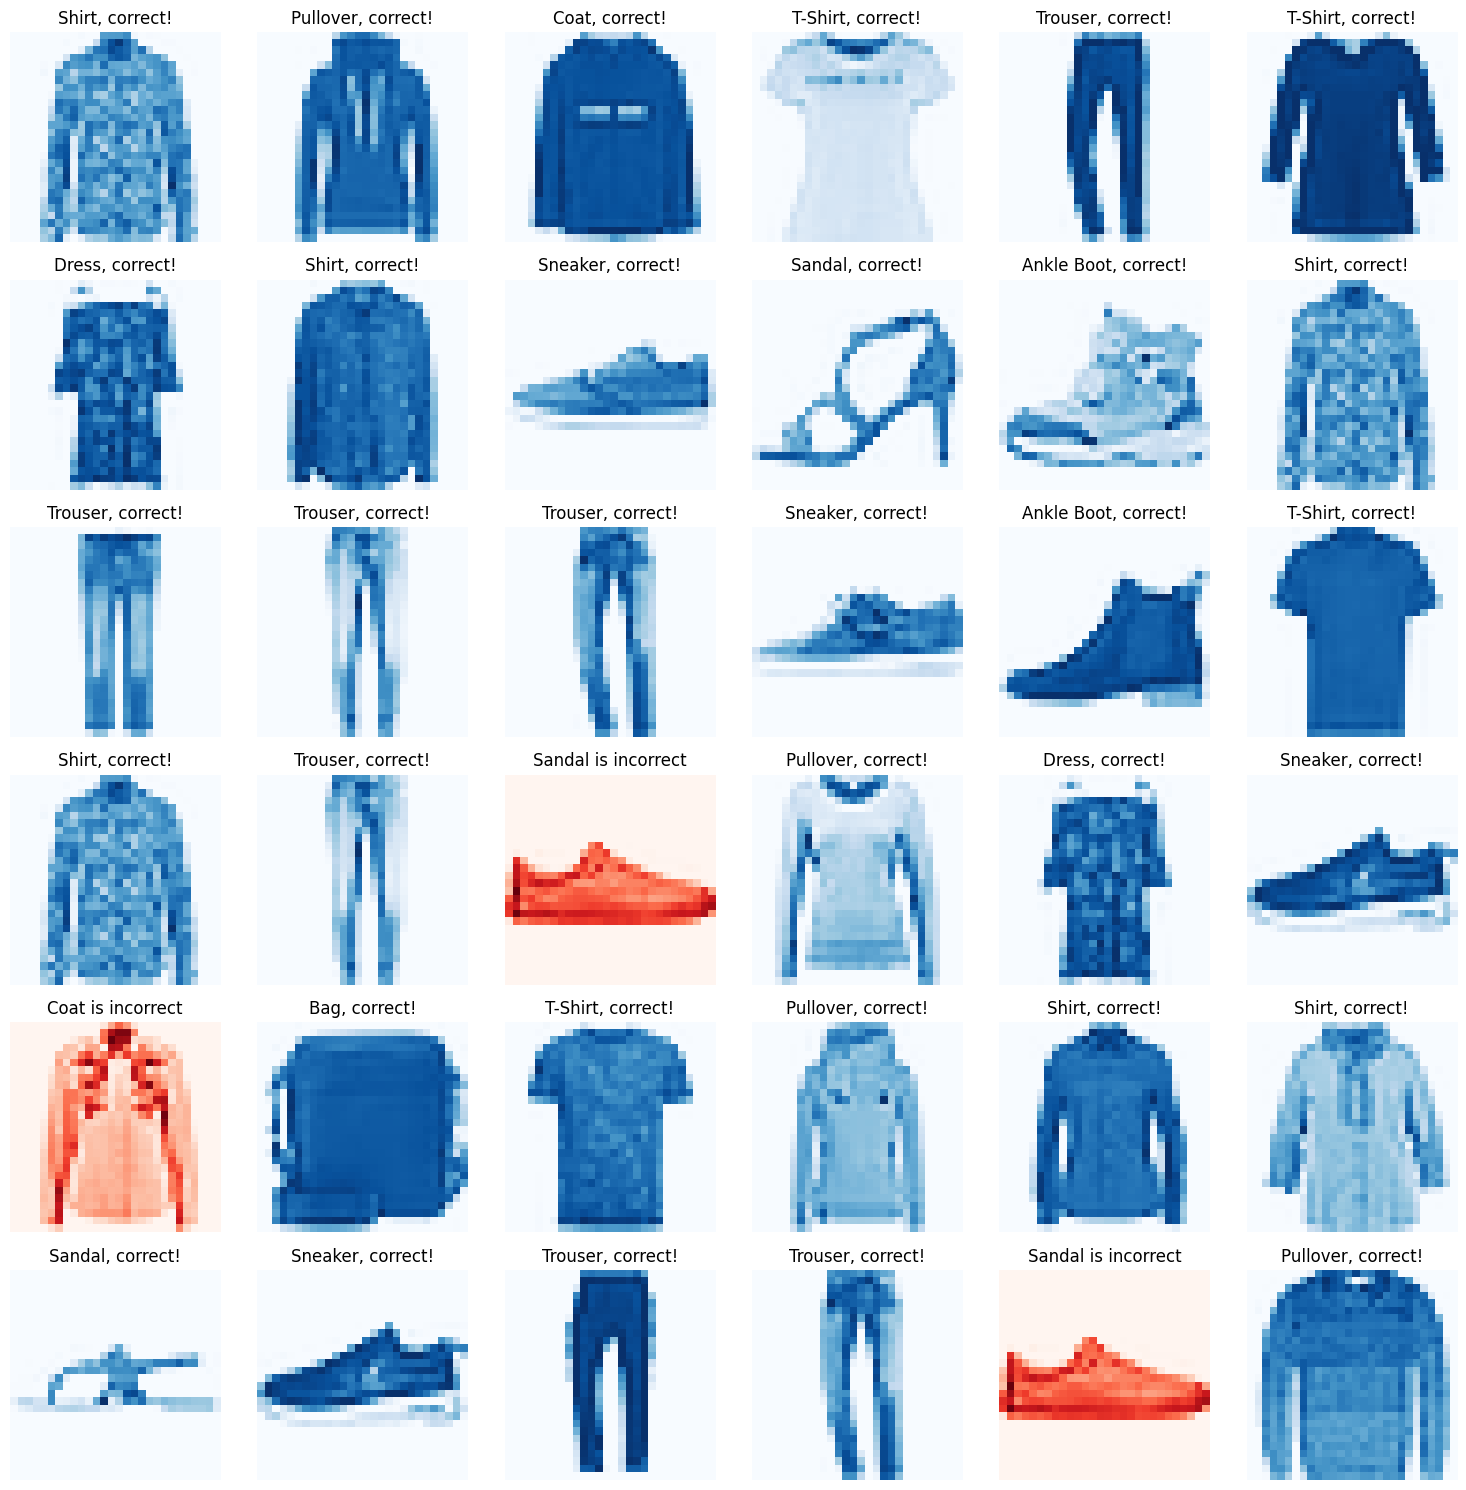

In [80]:
# 실제 분류 라벨
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows +1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
  cmap = "Blues" if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap=cmap)
  plt.title(title)
  plt.axis("off")

plt.tight_layout()
plt.show()